<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-Data-from-a-website" data-toc-modified-id="Get-Data-from-a-website-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get Data from a website</a></span></li><li><span><a href="#Intro-to-Linear-Regression" data-toc-modified-id="Intro-to-Linear-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Intro to Linear Regression</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Linear-Regression-using-stats-models" data-toc-modified-id="Linear-Regression-using-stats-models-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Linear Regression using stats models</a></span><ul class="toc-item"><li><span><a href="#Conceptos-del-OLS" data-toc-modified-id="Conceptos-del-OLS-2.0.1.1"><span class="toc-item-num">2.0.1.1&nbsp;&nbsp;</span>Conceptos del OLS</a></span></li><li><span><a href="#Model-comprobation" data-toc-modified-id="Model-comprobation-2.0.1.2"><span class="toc-item-num">2.0.1.2&nbsp;&nbsp;</span>Model comprobation</a></span></li></ul></li><li><span><a href="#Linear-regresion-with-sklearn" data-toc-modified-id="Linear-regresion-with-sklearn-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Linear regresion with sklearn</a></span><ul class="toc-item"><li><span><a href="#How-do-I-know-how-good-my-model-is?" data-toc-modified-id="How-do-I-know-how-good-my-model-is?-2.0.2.1"><span class="toc-item-num">2.0.2.1&nbsp;&nbsp;</span>How do I know how good my model is?</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Get Data from a website

[censo de poblacion](https://es.wikipedia.org/wiki/Demograf%C3%ADa_de_Espa%C3%B1a#Censo_de_poblaci%C3%B3n)

In [1]:
import pandas as pd 
import requests 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup 
import plotly.express as px

# Librerías de modelado
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:

# set the url to be scraped
url2 = "https://es.wikipedia.org/wiki/Demograf%C3%ADa_de_Espa%C3%B1a#Censo_de_poblaci%C3%B3n"

# request the url
response2=requests.get(url2)
response2

<Response [200]>

In [3]:
# make the soup
soup2 = BeautifulSoup(response2.text, 'html.parser')

# find the table
table2=soup2.find('table',{'class':"wikitable"})


In [4]:
# convert the table to a dataframe
df2=pd.read_html(str(table2))
print(type(df2))
# conversion de lista a DF
df2=pd.DataFrame(df2[0])
df2.head()


<class 'list'>


,[12]​[13]​[14]​,Población,Nacimientos vivos,Muertes,Cambio natural,Tasa cruda de natalidad (por cada 1000),Tasa cruda de mortalidad (por cada 1000),Cambio natural (por cada 1000),Tasa total de fertilidad[fn 1]​[14]​
0,1900,18 520 000,627 848,536 716,91 132,339.0,290.0,49.0,449.0
1,1901,18 610 000,650 649,517 575,133 074,350.0,278.0,71.0,471.0
2,1902,18 720 000,666 687,488 289,178 398,356.0,261.0,96.0,47.0
3,1903,18 810 000,685 265,470 387,214 878,364.0,250.0,114.0,468.0
4,1904,18 980 000,649 878,486 889,162 989,342.0,257.0,86.0,467.0


In [5]:
df2.columns = ["Año", 'Población', 'Nacimientos vivos', 'Muertes',
       'Cambio natural', 'Tasa cruda de natalidad',
       'Tasa cruda de mortalidad','Cambio natural(1000)',
       'Tasa total de fertilidad']
df2.columns = [column.rstrip().replace(' ', '_') for column in df2.columns] 

In [6]:
df2.head()

,Año,Población,Nacimientos_vivos,Muertes,Cambio_natural,Tasa_cruda_de_natalidad,Tasa_cruda_de_mortalidad,Cambio_natural(1000),Tasa_total_de_fertilidad
0,1900,18 520 000,627 848,536 716,91 132,339.0,290.0,49.0,449.0
1,1901,18 610 000,650 649,517 575,133 074,350.0,278.0,71.0,471.0
2,1902,18 720 000,666 687,488 289,178 398,356.0,261.0,96.0,47.0
3,1903,18 810 000,685 265,470 387,214 878,364.0,250.0,114.0,468.0
4,1904,18 980 000,649 878,486 889,162 989,342.0,257.0,86.0,467.0


In [7]:
def clean_numbers(x):
    try:
        return float(x.replace(' ',''))
    except: 
        return np.nan

lista =  ["Población", "Nacimientos_vivos", "Muertes", "Cambio_natural"]
for i in lista: 
    df2[i] = df2[i].apply(clean_numbers)


In [8]:
df2.isnull().sum()

Año                         0
Población                   8
Nacimientos_vivos           9
Muertes                     9
Cambio_natural              6
Tasa_cruda_de_natalidad     1
Tasa_cruda_de_mortalidad    1
Cambio_natural(1000)        1
Tasa_total_de_fertilidad    1
dtype: int64

In [9]:
df2.mean()

Año                         1.960500e+03
Población                   3.058324e+07
Nacimientos_vivos           5.749185e+05
Muertes                     3.719441e+05
Cambio_natural              1.981618e+05
Tasa_cruda_de_natalidad     2.016942e+02
Tasa_cruda_de_mortalidad    1.339091e+02
Cambio_natural(1000)        6.774380e+01
Tasa_total_de_fertilidad    2.501240e+02
dtype: float64

In [10]:
# rellenar los datos faltantes con la media
df_clean =  df2.fillna(df2.mean())

In [11]:
df_clean.isnull().sum()

Año                         0
Población                   0
Nacimientos_vivos           0
Muertes                     0
Cambio_natural              0
Tasa_cruda_de_natalidad     0
Tasa_cruda_de_mortalidad    0
Cambio_natural(1000)        0
Tasa_total_de_fertilidad    0
dtype: int64

In [12]:
df_clean.head()

,Año,Población,Nacimientos_vivos,Muertes,Cambio_natural,Tasa_cruda_de_natalidad,Tasa_cruda_de_mortalidad,Cambio_natural(1000),Tasa_total_de_fertilidad
0,1900,18520000.0,627848.0,536716.0,91132.0,339.0,290.0,49.0,449.0
1,1901,18610000.0,650649.0,517575.0,133074.0,350.0,278.0,71.0,471.0
2,1902,18720000.0,666687.0,488289.0,178398.0,356.0,261.0,96.0,47.0
3,1903,18810000.0,685265.0,470387.0,214878.0,364.0,250.0,114.0,468.0
4,1904,18980000.0,649878.0,486889.0,162989.0,342.0,257.0,86.0,467.0


In [13]:
df2.to_csv('../data/demografia_espana.csv', index=False)

# Intro to Linear Regression

A **linear regression** model is a supervised parametric model ( it’s based on a given formula )

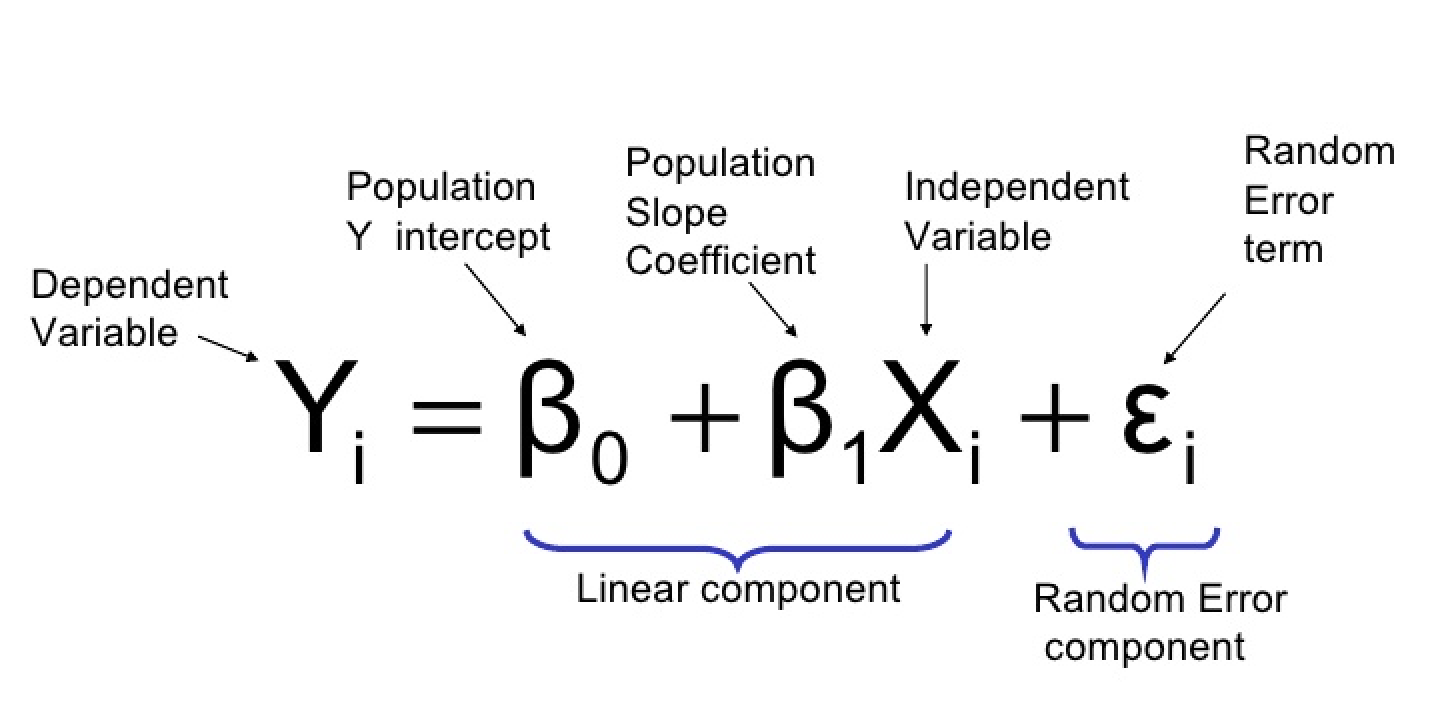

**What does this formula mean?**

- `Y`: is the response variable (dependent variable)


- `β0` (intercept) : the mean of what Y would be worth in the absence of any absence of independent variables


- `β1`, `β2`:  combination of predictor (or independent) variables



- `ε`: value that assumes all variation in Y not explained by variations in the independent variables


Therefore, we have **two main parameters**: 

- `Slope`: it tells you how much you can expect Y to change as X increases. In general, the units for slope are the units of the Y variable per units of the X variable. It's a ratio of change in Y per change in X.


- `Intercept`:  the mean value of the response variable when all of the predictor variables in the model are equal to zero, i.e. there is no effect of our predictor variables in our model.

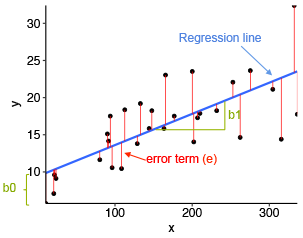

A **linear regression** model is one particular type of regression which is making the following four assumptions about the data:

- `Lineality` ( the relation between the independent feature and the dependent feature is linear ). Measured by correlation coefficient.


- `Independency`: every observation used to train the model doesn’t depend of another.


- `Normality`: all the variables (independent and dependent) follow a normal distribution

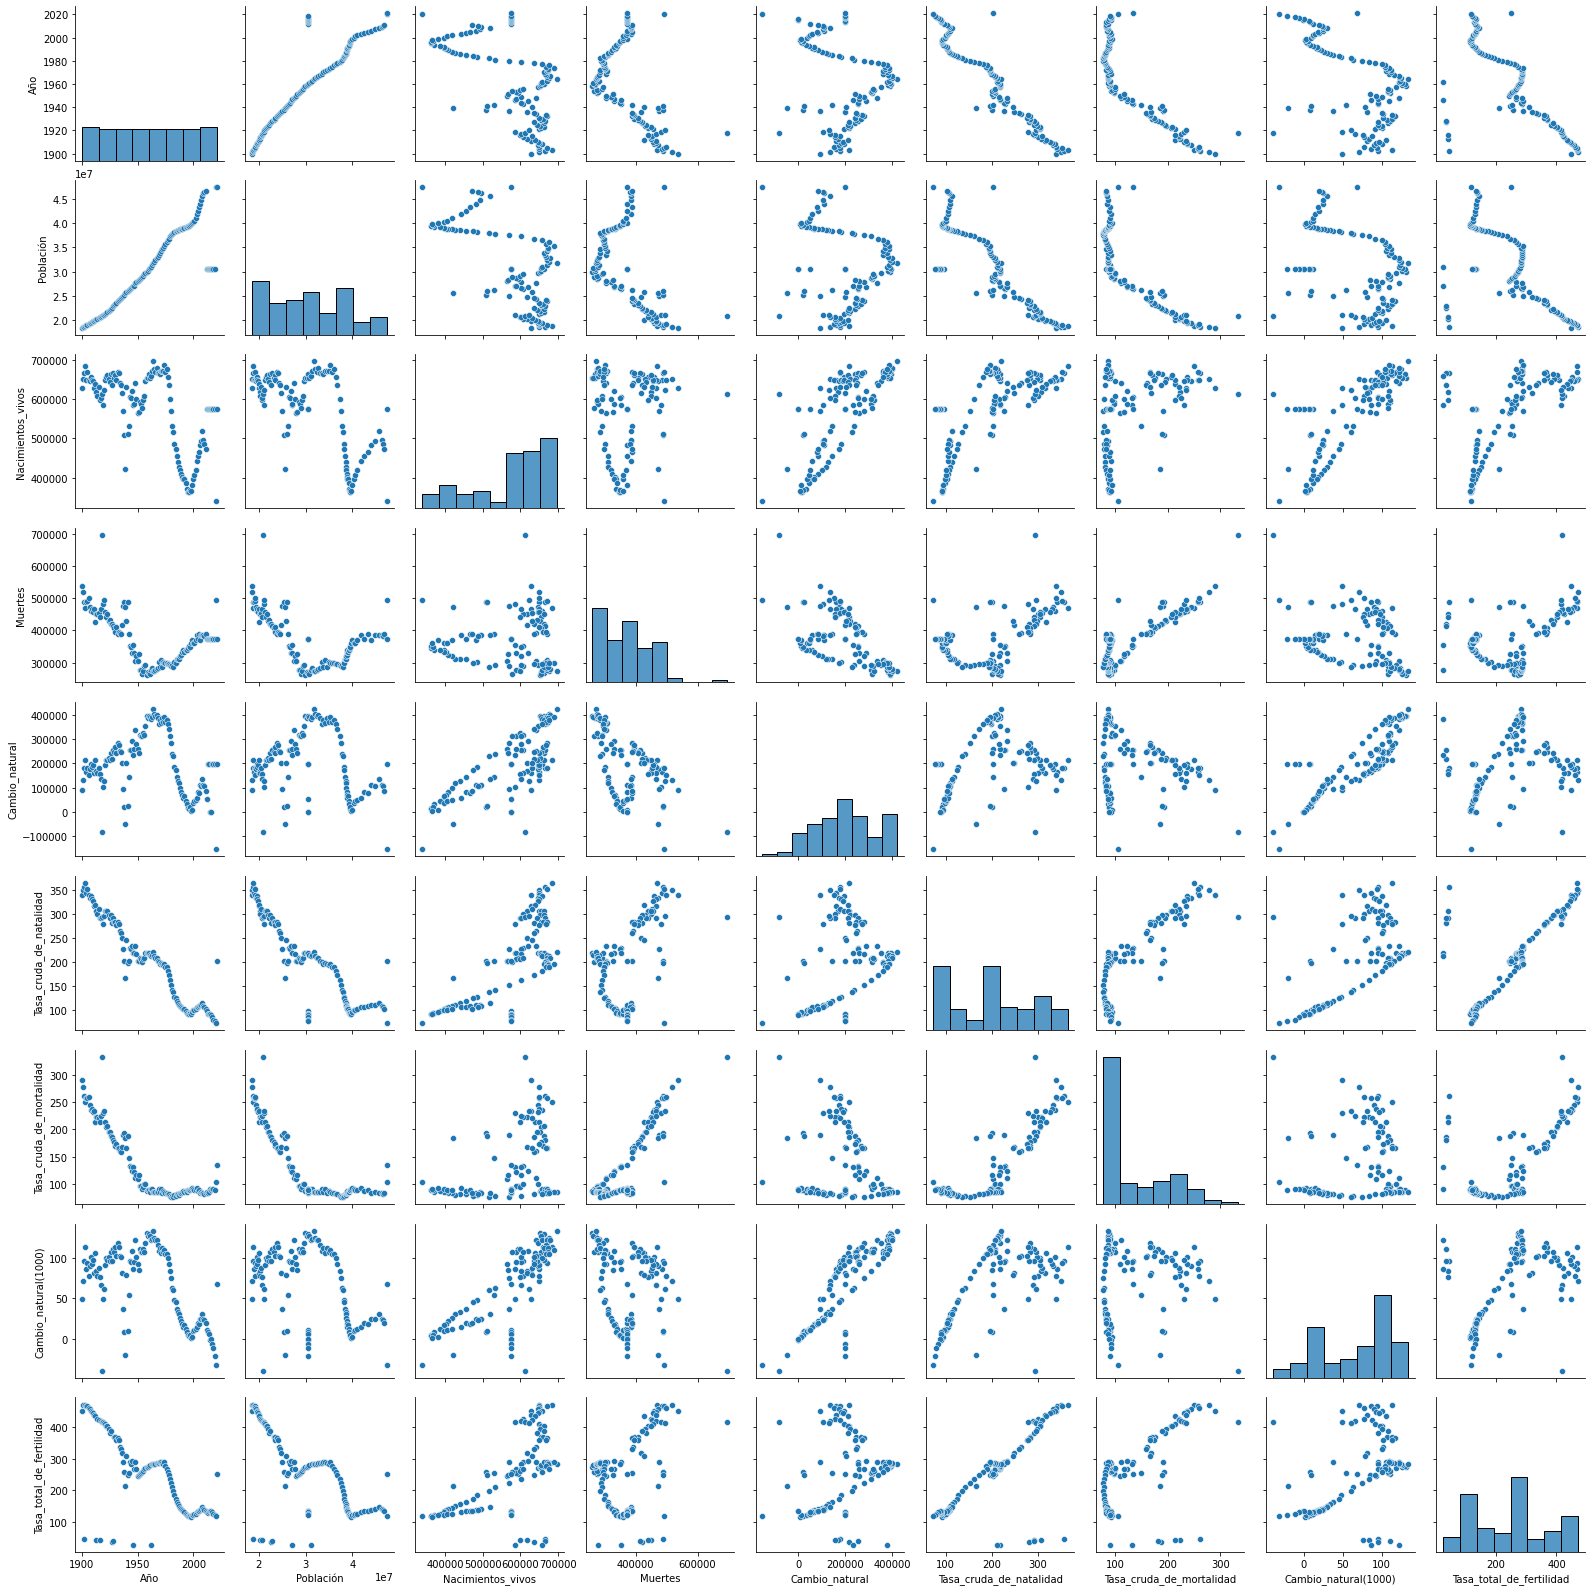

In [14]:
sns.pairplot(df_clean);

In [15]:
df_clean.corr()

,Año,Población,Nacimientos_vivos,Muertes,Cambio_natural,Tasa_cruda_de_natalidad,Tasa_cruda_de_mortalidad,Cambio_natural(1000),Tasa_total_de_fertilidad
Año,1.000000,0.904364,-0.609358,-0.523282,-0.215016,-0.960080,-0.856901,-0.572272,-0.719211
Población,0.904364,1.000000,-0.661380,-0.535762,-0.189281,-0.873843,-0.823867,-0.457175,-0.652052
Nacimientos_vivos,-0.609358,-0.661380,1.000000,0.057467,0.750848,0.745132,0.399423,0.809667,0.609882
Muertes,-0.523282,-0.535762,0.057467,1.000000,-0.573499,0.499388,0.870033,-0.292033,0.384135
Cambio_natural,-0.215016,-0.189281,0.750848,-0.573499,1.000000,0.327966,-0.196649,0.872527,0.279476
Tasa_cruda_de_natalidad,-0.960080,-0.873843,0.745132,0.499388,0.327966,1.000000,0.843096,0.664211,0.760872
Tasa_cruda_de_mortalidad,-0.856901,-0.823867,0.399423,0.870033,-0.196649,0.843096,1.000000,0.158178,0.641384
Cambio_natural(1000),-0.572272,-0.457175,0.809667,-0.292033,0.872527,0.664211,0.158178,1.000000,0.504112
Tasa_total_de_fertilidad,-0.719211,-0.652052,0.609882,0.384135,0.279476,0.760872,0.641384,0.504112,1.000000


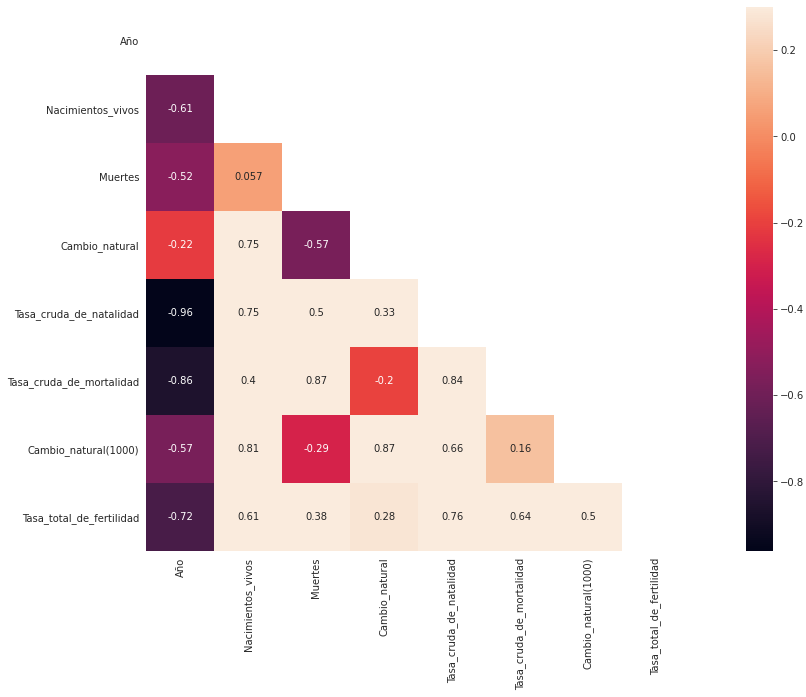

In [16]:
df_corr = df_clean.drop(["Población"], axis = 1)
corr = df_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot = True)

### Linear Regression using stats models

#### Conceptos del OLS
- R2 : The coefficient of determination measures how much of the variance of 𝑦 is explained by the model. If the variance of the errors or residuals 𝜎2𝑒 is zero, the model explains 100% of the variable 𝑦. If 𝜎2𝑒 is equal to the variance of 𝑦 the model explains nothing and 𝑅2 is zero.


- 𝑅¯2 : The adjusted correlation coefficient 𝑅¯2 corrects the value of 𝑅2 for the number of variables 𝑘 (equal to 2 for the analysed case) and the amount of data 𝑁.


- P-value A low p-value (< 0.05) indicates that the variable helps to predict better



Cuando haga esto ir metiendo variable a variable

In [17]:
results = smf.ols("Población ~ Población + Nacimientos_vivos +  Muertes +  Cambio_natural + Tasa_cruda_de_natalidad + Tasa_cruda_de_mortalidad +   Tasa_total_de_fertilidad", data=df_clean).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Población   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.193e+30
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:03:18   Log-Likelihood:                 1940.8
No. Observations:                 122   AIC:                            -3866.
Df Residuals:                     114   BIC:                            -3843.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -5.215e-08   5.46e-08     -0.955      0.342    -1.6e-07     5.6e-08
Población                    1.0000   9.67e-16   1.03e+15      0.000       1.000       1.000
Nacimientos_vivos          6.75e-14   1.15e-13      0.585      0.560   -1.61e-13    2.96e-13
Muertes                    1.35e-13   2.26e-13      0.598      0.551   -3.12e-13    5.82e-13
Cambio_natural           -3.553e-15   1.14e-13     -0.031      0.975    -2.3e-13    2.23e-13
Tasa_cruda_de_natalidad   2.183e-10   2.19e-10      0.998      0.321   -2.15e-10    6.52e-10
Tasa_cruda_de_mortalidad -3.347e-10   4.49e-10     -0.745      0.458   -1.22e-09    5.55e-10
Tasa_total_de_fertilidad  -9.55e-12   3.65e-11     -0.262      0.794   -8.18e-11    6.27e-11
==============================================================================
Omnibus:                       12.294   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.395
Skew:                           0.569   Prob(JB):                      0.00912
Kurtosis:                       2.257   Cond. No.                     6.18e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model comprobation

- Check for **non-significant** coefficients --> using the *p-values*


- Check that the model is sufficiently realistic. There are two ways:
    
  - `R2`: percentage of the total variability of Y attributable to or explained by the variables in the model. R2 will always be a quantity between 0-1, with values closer to one being indicative of an adequate model.
  - `standard deviation of the residuals`: represents the average distance of the points from their projections on the regression hyperplane (or the linear regression we have "painted"). The larger the deviation, the greater the dispersion between the points and therefore the greater the distance between the true and predicted points, i.e. the worse the model.
    
    
  

###  Linear regresion with sklearn


In [38]:
# Store the variables x,y
X = df_clean.drop( ["Población"], axis = 1 )
y = df_clean[["Población"]]

In [39]:
lr = LinearRegression()


In [40]:
lr.fit(X, y)

LinearRegression()

In [34]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [32]:
beta_1

array([ 2.73130187e+05, -8.13814702e+01,  8.09612232e+01,  3.57124653e+01,
       -2.65575739e+05,  2.48471396e+05,  3.99061947e+05,  4.01428935e+03])

In [29]:
beta_0

array([-5.0303621e+08])

#### How do I know how good my model is?

**Calculation of the mean absolute error, mean square error and mean square error**.

- MAE is the easiest to understand, because it is the mean error.

  
- MSE is more popular than MAE, because MSE "penalises" larger errors, which is often useful in the real world.


- RMSE is even more popular than MSE, it is the square root of the MSE and measures the standard deviation of the residuals.


In [24]:
pred = lr.predict(X)
df_clean["pred"] = pred
df_clean.head()

,Año,Población,Nacimientos_vivos,Muertes,Cambio_natural,Tasa_cruda_de_natalidad,Tasa_cruda_de_mortalidad,Cambio_natural(1000),Tasa_total_de_fertilidad,pred
0,1900,18520000.0,627848.0,536716.0,91132.0,339.0,290.0,49.0,449.0,1.490667e+07
1,1901,18610000.0,650649.0,517575.0,133074.0,350.0,278.0,71.0,471.0,1.623708e+07
2,1902,18720000.0,666687.0,488289.0,178398.0,356.0,261.0,96.0,47.0,1.690963e+07
3,1903,18810000.0,685265.0,470387.0,214878.0,364.0,250.0,114.0,468.0,1.953962e+07
4,1904,18980000.0,649878.0,486889.0,162989.0,342.0,257.0,86.0,467.0,1.857975e+07


In [25]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(df_clean.Población, df_clean.pred))
print("MSE: ", metrics.mean_squared_error(df_clean.Población, df_clean.pred))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(df_clean.Población, df_clean.pred)))


MAE:  1553686.6418406058
MSE:  4091141891931.767
RMSE:  2022657.1365240742
